<h1 style="text-align: center; color: purple;" markdown="1">Econ 320: Final Project </h1>

<h2 style="text-align: center; color: #012169" markdown="1">Proposal </h2>
<h2 style="text-align: center; color: #012169" markdown="1">Wendy Chen, Kristina Gong, Xiuyi Qian, Yao Zhang</h2>

## Package setup

In [1]:
import wooldridge as woo
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import scipy.stats as stats
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
import statsmodels.stats.outliers_influence as smo
import patsy as pt
from patsy.builtins import *

## Introduction and Motivation

In this project, we expect to study how a country’s happiness level can be predicted by variables, including individual level of freedom, generosity, GDP per Capita, and government corruption. It is interesting because national happiness level is significant in evalution of a nation wellness and statisfaction its citizens enjoy. We expect to conduct a similar evalution by testing what exactly the variables are that have such huge effects in determining citizens' happiness level. To achieve this, we expect to use the dataset "Happiness2017" with the assistance of regression model to test the effects of each variable.

The regression model that we developed contains numerous variables, some of which had been tested by previous literatures. As literature, “The Most Influential Factor in Determining the Happiness of Nations“, by Julie Lang, indicates, low corruption, low unemployment rate and a high HPI number are effective at predicting happiness level within a country. Departing from this recognization, we develop our model incorporating government corruption as a key variable in predicting national happiness level.

In [2]:
happiness = pd.read_csv("/Users/gongxiaoyun/大二下/320 lab/python/final project/Happiness2017.csv")


In [10]:
cormat = happiness[["Happiness Score","GDP per Capita","Family","Life Expectancy","Freedom","Generosity","Government Corruption"]]
cormat.corr().round(decimals=2)

,Happiness Score,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Government Corruption
Happiness Score,1.00,0.81,0.75,0.78,0.57,0.16,0.43
GDP per Capita,0.81,1.00,0.69,0.84,0.37,-0.02,0.35
Family,0.75,0.69,1.00,0.61,0.42,0.05,0.23
Life Expectancy,0.78,0.84,0.61,1.00,0.35,0.06,0.28
Freedom,0.57,0.37,0.42,0.35,1.00,0.32,0.50
Generosity,0.16,-0.02,0.05,0.06,0.32,1.00,0.29
Government Corruption,0.43,0.35,0.23,0.28,0.50,0.29,1.00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf99bd4ad0>,
      dtype=object)

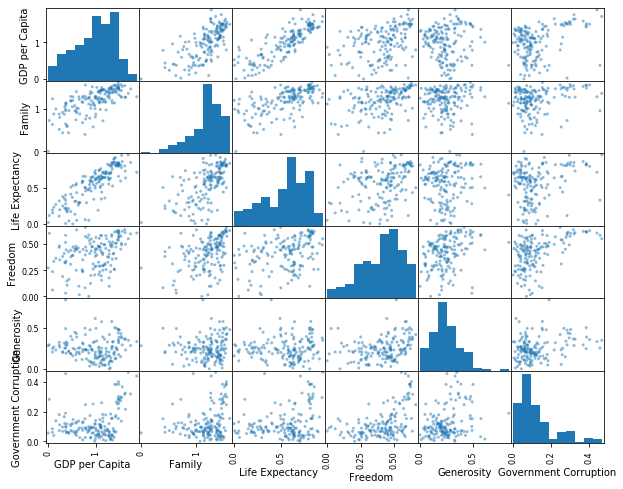

In [8]:
pd.plotting.scatter_matrix(cormat, alpha=0.5, figsize=(10, 8))

## Data

This dataset records the happiness scores over 154 nations around the world. It includes individual level factors, such as life Expectance, as well as social factors, such as Government corruption.

In [11]:
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                155 non-null    object 
 1   Happiness Rank         155 non-null    int64  
 2   Happiness Score        155 non-null    float64
 3   Whisker high           155 non-null    float64
 4   Whisker low            155 non-null    float64
 5   GDP per Capita         155 non-null    float64
 6   Family                 155 non-null    float64
 7   Life Expectancy        155 non-null    float64
 8   Freedom                155 non-null    float64
 9   Generosity             155 non-null    float64
 10  Government Corruption  155 non-null    float64
 11  Dystopia / Residual    155 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.7+ KB


This data set contains happiness information from 155 countries. It involves 6 aspects ranging from personal factors to social factors.

In [13]:
happiness.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Government Corruption,Dystopia / Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [12]:
happiness.describe()

,Happiness Rank,Happiness Score,Whisker high,Whisker low,GDP per Capita,Family,Life Expectancy,Freedom,Generosity,Government Corruption,Dystopia / Residual
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,78.000000,5.354019,5.452326,5.255713,0.984718,1.188898,0.551341,0.408786,0.246883,0.123120,1.850238
std,44.888751,1.131230,1.118542,1.145030,0.420793,0.287263,0.237073,0.149997,0.134780,0.101661,0.500028
min,1.000000,2.693000,2.864884,2.521116,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.377914
25%,39.500000,4.505500,4.608172,4.374955,0.663371,1.042635,0.369866,0.303677,0.154106,0.057271,1.591291
50%,78.000000,5.279000,5.370032,5.193152,1.064578,1.253918,0.606042,0.437454,0.231538,0.089848,1.832910
75%,116.500000,6.101500,6.194600,6.006527,1.318027,1.414316,0.723008,0.516561,0.323762,0.153296,2.144654
max,155.000000,7.537000,7.622030,7.479556,1.870766,1.610574,0.949492,0.658249,0.838075,0.464308,3.117485


By using the `describe()` method, we observe that the data has the following characteristics:

* This data contains the data adjusted from the raw data. For instance, happiness score is the average value of the raw happiness scores imposed by the sufficient population of the surveyed.
* The whisker high is the largest happiness score smaller than 1.5IQR above the third quartile.
* The whisker low is the smallest happiness score larger than 1.5IQR below the first quartile.
* Dystopia/Residual is the score of the country that has a lower rank than the lowest ranking country on the report, plus the residual value of each country.

## Methodology/Empirical Model

* Our proposed economic model should look like:

$ Happiness = Wealthiness + Healthiness + Social$ $Relationship$ + $Optimism$ + $mental state$

* We propose the econometric model to be a regression model. 

$$ Happiness Score = \beta_0 +\beta_1 GDP per Capita + \beta_2 Family + \beta_3 life Expectancy + \beta_4 Freedom + \beta_5 Generosity + \beta_6 Government Corruption + u$$ 

Because we want to evaluate the effect of independent variables on the dependent variable, and linear multiple regression model can help us identify the extent of the regressors in a numerical format. 
The GDP per Capita measures wealthiness, family and government corruption measures social relationship, life expectancy is the combination of optimism and healthiness, and freedom and generosity are indicators of mental state.

In [24]:
happiness.columns = happiness.columns.str.replace(' ','_')
m1 = smf.ols(formula="Happiness_Score ~ GDP_per_Capita + Family + Life_Expectancy + Freedom + Generosity + Government_Corruption", 
             data=happiness)

In [26]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     106.8
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           3.11e-51
Time:                        22:14:26   Log-Likelihood:                -108.84
No. Observations:                 155   AIC:                             231.7
Df Residuals:                     148   BIC:                             253.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.7430      0.187      9.303      0.000       1.373       2.113
GDP_per_Capita            0.7844      0.205      3.836      0.000       0.380       1.189
Family                    1.1178      0.202      5.532      0.000       0.718       1.517
Life_Expectancy           1.2889      0.322      4.009      0.000       0.654       1.924
Freedom                   1.4757      0.343      4.309      0.000       0.799       2.153
Generosity                0.3807      0.329      1.156      0.250      -0.270       1.032
Government_Corruption     0.8266      0.484      1.707      0.090      -0.130       1.784
==============================================================================
Omnibus:                        6.076   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.254
Skew:                          -0.333   Prob(JB):                       0.0438
Kurtosis:                       3.725   Cond. No.                         26.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
m2 = smf.ols(formula="Happiness_Score ~ GDP_per_Capita*Life_Expectancy + Family + Freedom + Generosity + Government_Corruption", 
             data=happiness).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     94.49
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           3.49e-51
Time:                        22:18:09   Log-Likelihood:                -106.44
No. Observations:                 155   AIC:                             228.9
Df Residuals:                     147   BIC:                             253.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          2.1262      0.257      8.281      0.000       1.619       2.634
GDP_per_Capita                     0.2445      0.322      0.759      0.449      -0.392       0.881
Life_Expectancy                    0.3368      0.544      0.619      0.537      -0.739       1.413
GDP_per_Capita:Life_Expectancy     1.0669      0.495      2.153      0.033       0.088       2.046
Family                             1.1720      0.201      5.825      0.000       0.774       1.570
Freedom                            1.5230      0.339      4.492      0.000       0.853       2.193
Generosity                         0.2850      0.328      0.868      0.387      -0.364       0.934
Government_Corruption              0.3794      0.522      0.727      0.468      -0.651       1.410
==============================================================================
Omnibus:                        5.560   Durbin-Watson:                   1.794
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                5.728
Skew:                          -0.302   Prob(JB):                       0.0570
Kurtosis:                       3.722   Cond. No.                         43.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
gdpg = [0, 
        np.percentile(happiness["GDP_per_Capita"],25), 
        happiness["GDP_per_Capita"].median(), 
        np.percentile(happiness["GDP_per_Capita"],75),
        happiness["GDP_per_Capita"].max()]
happiness['GDP_g'] = pd.cut(happiness["GDP_per_Capita"], bins = gdpg,
                        labels=['0-25 percentile', '25-50 percentile', '50-75 percentile', '75-100 percentile'])

In [52]:
m3 = smf.ols(formula="Happiness_Score ~ C(GDP_g, Treatment('0-25 percentile')) + Life_Expectancy + Family + Freedom + Generosity + Government_Corruption", 
             data=happiness).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     81.39
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           9.09e-50
Time:                        22:44:17   Log-Likelihood:                -103.54
No. Observations:                 154   AIC:                             225.1
Df Residuals:                     145   BIC:                             252.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       2.0471      0.221      9.264      0.000       1.610       2.484
C(GDP_g, Treatment('0-25 percentile'))[T.25-50 percentile]      0.4659      0.143      3.264      0.001       0.184       0.748
C(GDP_g, Treatment('0-25 percentile'))[T.50-75 percentile]      0.7677      0.180      4.253      0.000       0.411       1.124
C(GDP_g, Treatment('0-25 percentile'))[T.75-100 percentile]     1.0685      0.221      4.826      0.000       0.631       1.506
Life_Expectancy                                                 1.0464      0.317      3.303      0.001       0.420       1.673
Family                                                          1.1433      0.203      5.626      0.000       0.742       1.545
Freedom                                                         1.4494      0.337      4.303      0.000       0.784       2.115
Generosity                                                      0.4140      0.332      1.245      0.215      -0.243       1.071
Government_Corruption                                           0.8228      0.510      1.614      0.109      -0.185       1.831
==============================================================================
Omnibus:                        8.149   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.373
Skew:                          -0.444   Prob(JB):                       0.0152
Kurtosis:                       3.719   Cond. No.                         24.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
m4 = smf.ols(formula="Happiness_Score ~ C(GDP_g, Treatment('0-25 percentile')) * Life_Expectancy + Family + Freedom + Generosity + Government_Corruption", 
             data=happiness).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Happiness_Score   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     64.22
Date:                Mon, 26 Apr 2021   Prob (F-statistic):           1.65e-49
Time:                        22:33:32   Log-Likelihood:                -97.033
No. Observations:                 154   AIC:                             218.1
Df Residuals:                     142   BIC:                             254.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                       2.2503      0.235      9.562      0.000       1.785       2.716
C(GDP_g, Treatment('0-25 percentile'))[T.25-50 percentile]                      0.1647      0.309      0.533      0.595      -0.447       0.776
C(GDP_g, Treatment('0-25 percentile'))[T.50-75 percentile]                     -0.8642      0.506     -1.708      0.090      -1.865       0.136
C(GDP_g, Treatment('0-25 percentile'))[T.75-100 percentile]                     1.2097      0.721      1.678      0.095      -0.215       2.635
Life_Expectancy                                                                -0.0221      0.559     -0.039      0.969      -1.128       1.084
C(GDP_g, Treatment('0-25 percentile'))[T.25-50 percentile]:Life_Expectancy      1.1076      0.732      1.513      0.132      -0.339       2.555
C(GDP_g, Treatment('0-25 percentile'))[T.50-75 percentile]:Life_Expectancy      3.1802      0.916      3.473      0.001       1.370       4.990
C(GDP_g, Treatment('0-25 percentile'))[T.75-100 percentile]:Life_Expectancy     0.4882      1.032      0.473      0.637      -1.551       2.528
Family                                                                          1.1825      0.197      5.990      0.000       0.792       1.573
Freedom                                                                         1.4791      0.329      4.499      0.000       0.829       2.129
Generosity                                                                      0.4479      0.323      1.385      0.168      -0.191       1.087
Government_Corruption                                                           0.9916      0.502      1.977      0.050       0.000       1.983
==============================================================================
Omnibus:                        5.448   Durbin-Watson:                   1.768
Prob(Omnibus):                  0.066   Jarque-Bera (JB):                4.997
Skew:                          -0.417   Prob(JB):                       0.0822
Kurtosis:                       3.288   Cond. No.                         68.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
st=Stargazer([m1,m2,m3,m4])
from IPython.core.display import HTML
st.rename_covariates({"C(GDP_g, Treatment('0-25 percentile'))[T.25-50 percentile]":"25-50 percentile GDP per capita",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.25-50 percentile]:Life_Expectancy":"25-50 percentile GDP per capita: Life Expectancy",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.50-75 percentile]":"50-75 percentile GDP per capita",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.50-75 percentile]:Life_Expectancy":"50-75 percentile GDP per capita: Life Expectancy",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.75-100 percentile]":"75-100 percentile GDP per capita",
                    "C(GDP_g, Treatment('0-25 percentile'))[T.75-100 percentile]:Life_Expectancy":"75-100 percentile GDP per capita: Life Expectancy",
                    "GDP_per_Capita":"GDP per capita","GDP_per_Capita:Life_Expectancy":"GDP per capita: Life Expectancy",
                    "Government_Corruption":"Government Corruption","Life_Expectancy":"Life Expectancy"})
st.custom_columns(["m1","m2","m3","m4"],[1,1,1,1])
HTML(st.render_html())

In [77]:
m5 = smf.ols(formula="np.log(Happiness_Score) ~ GDP_per_Capita + Family + Life_Expectancy + Freedom + I(Freedom**2) + Generosity + Government_Corruption", 
             data=happiness).fit()
m5.summary() #check whether freedom is quadratically correlated with happiness

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     np.log(Happiness_Score)   R-squared:                       0.817
Model:                                 OLS   Adj. R-squared:                  0.809
Method:                      Least Squares   F-statistic:                     93.96
Date:                     Mon, 26 Apr 2021   Prob (F-statistic):           4.87e-51
Time:                             23:17:12   Log-Likelihood:                 146.66
No. Observations:                      155   AIC:                            -277.3
Df Residuals:                          147   BIC:                            -253.0
Df Model:                                7                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.9193      0.056     16.506      0.000       0.809       1.029
GDP_per_Capita            0.1512      0.040      3.823      0.000       0.073       0.229
Family                    0.2422      0.039      6.157      0.000       0.164       0.320
Life_Expectancy           0.2544      0.062      4.083      0.000       0.131       0.378
Freedom                   0.4257      0.236      1.803      0.073      -0.041       0.892
I(Freedom ** 2)          -0.1902      0.342     -0.556      0.579      -0.866       0.486
Generosity                0.0466      0.066      0.706      0.481      -0.084       0.177
Government_Corruption     0.0699      0.101      0.689      0.492      -0.131       0.270
==============================================================================
Omnibus:                       11.723   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               20.229
Skew:                          -0.350   Prob(JB):                     4.05e-05
Kurtosis:                       4.625   Cond. No.                         110.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
m5.params

Intercept                1.818235
GDP_per_Capita           0.780177
Family                   1.108744
Life_Expectancy          1.298870
Freedom                  1.073202
I(Freedom ** 2)          0.607592
Generosity               0.349382
Government_Corruption    0.756553
dtype: float64

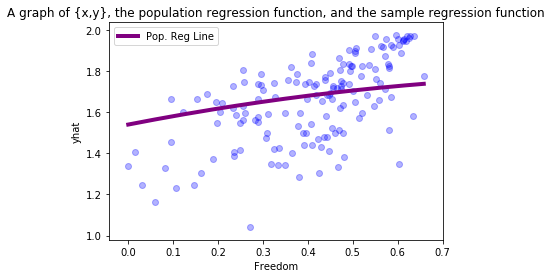

In [82]:
# set the proper variables 
happiness['yhat'] = m5.fittedvalues
# htv['resid'] = m3.resid
happiness['yav'] = m5.params[0] + m5.params[1]*happiness["GDP_per_Capita"].mean() + m5.params[2]*happiness["Family"].mean() + m5.params[3]*happiness["Life_Expectancy"].mean() + m5.params[4]*happiness['Freedom'] +  m5.params[5]*(happiness['Freedom']**2) + m5.params[6]*happiness["Generosity"].mean() + m5.params[3]*happiness["Government_Corruption"].mean()

# You need to sort the values by abil so that the line plots nicely. Try not doing it and see what happens
happiness.sort_values(by=['Freedom'], inplace=True)

# this does the scatter of the abil vs predicted education function
sns.regplot("Freedom", "yhat", scatter_kws={"color": "blue", 'alpha': 0.3}, fit_reg=False,
            data=happiness).set_title("Happiness vs Freedom")
# this adds the line that shows the quadratic relation between this two.
plt.plot(happiness["Freedom"], happiness["yav"], color='purple', linewidth=4, label="Pop. Reg Line")
plt.title("A graph of {x,y}, the population regression function, and the sample regression function" )
plt.legend(loc='upper left')
plt.show()